# Churn Prediction <a class='tocSkip'> </a>

# TOC: <a class='tocSkip'>


* [1. Churn Prediction](#2.Churn-Prediction)
    * [1.1 Data Processing](#2.1-Data-Processing)
    * [1.2. Machine Learning Algorithms](#2.2-Machine-Learning-Algorithms)
    * [1.3. Results](#2.3-Results)
    * [1.4. Conclusion](#2.4-Conclusion)

In [2]:
# Matplotlib show
%matplotlib inline

# Loading Libraries
import pandas as pd;
import numpy as np;
import scipy as sc;
from sklearn.linear_model import LogisticRegression;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import BaggingClassifier;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.preprocessing import StandardScaler;
from sklearn.svm import LinearSVC;
from sklearn.utils import shuffle;
from sklearn.metrics import roc_auc_score;
from sklearn.metrics import accuracy_score;
from sklearn.metrics import confusion_matrix;
from sklearn.model_selection import cross_val_score;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import GridSearchCV;
import pickle;
import warnings;
import matplotlib.pyplot as plt;
from IPython.display import display, HTML, Image;
warnings.simplefilter('ignore');

# Churn Prediction

In [3]:
# 1. Loading Dataset
datapath = r'supplementary_files/churn_prediction/churn.xlsx'
train_data = pd.read_excel(datapath, 'train')

test_data = pd.read_excel(datapath, 'test')

## Data Processing

The following steps were undertaken to prepare the data for various Machine Learning Algorithms:

1) All the Categorical Variables were encoded using **One Hot Encoding** method.

* 'One Hot Encoding' means that, all categories were converted to dummy variables and were added as a separate column. The Preview of the Dataset below should clarify this step.

2) The dates column were ignored since the `retained` column is directly a function of the three dates column. 

3) The 'X' and the 'Y' variables were separated in both the trainig and test data.

In [4]:
# Data Processing

# Converting to categorical data

# Fav day
train_data["favday"].astype('category')

# City
train_data["city"].astype('category')

# Train Data

# Encoding favday into numbers
train_data["Monday"] = np.where(train_data.favday == 'Monday', 1, 0)
train_data["Tuesday"] = np.where(train_data.favday == 'Tuesday', 1, 0)
train_data["Wednesday"] = np.where(train_data.favday == 'Wednesday', 1, 0)
train_data["Thursday"] = np.where(train_data.favday == 'Thursday', 1, 0)
train_data["Friday"] = np.where(train_data.favday == 'Friday', 1, 0)
train_data["Saturday"] = np.where(train_data.favday == 'Saturday', 1, 0)
train_data["Sunday"] = np.where(train_data.favday == 'Sunday', 1, 0)

# Encoding city into numbers
train_data["BWI"] = np.where(train_data.city == 'BWI', 1, 0)
train_data["CHO"] = np.where(train_data.city == 'CHO', 1, 0)
train_data["DCX"] = np.where(train_data.city == 'DCX', 1, 0)
train_data["RIC"] = np.where(train_data.city == 'RIC', 1, 0)



# Test Data

# Making sure that favday and city are categories
test_data["favday"].astype('category')

# Encoding favday into numbers
test_data["Monday"] = np.where(test_data.favday == 'Monday', 1, 0)
test_data["Tuesday"] = np.where(test_data.favday == 'Tuesday', 1, 0)
test_data["Wednesday"] = np.where(test_data.favday == 'Wednesday', 1, 0)
test_data["Thursday"] = np.where(test_data.favday == 'Thursday', 1, 0)
test_data["Friday"] = np.where(test_data.favday == 'Friday', 1, 0)
test_data["Saturday"] = np.where(test_data.favday == 'Saturday', 1, 0)
test_data["Sunday"] = np.where(test_data.favday == 'Sunday', 1, 0)


test_data["city"].astype('category')

# Encoding city into numbers
test_data["BWI"] = np.where(test_data.city == 'BWI', 1, 0)
test_data["CHO"] = np.where(test_data.city == 'CHO', 1, 0)
test_data["DCX"] = np.where(test_data.city == 'DCX', 1, 0)
test_data["RIC"] = np.where(test_data.city == 'RIC', 1, 0)

In [5]:
# Splitting Train x and Train y

# Train 

train_x = train_data[['esent', 'eopenrate', 'eclickrate', 'avgorder',
                      'ordfreq', 'paperless', 'refill', 'doorstep', 'Monday',
                      'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                      'Sunday', 'BWI', 'CHO', 'DCX', 'RIC']]

train_y = train_data[['retained']]

# Test

test_x = test_data[['esent', 'eopenrate', 'eclickrate', 'avgorder',
                      'ordfreq', 'paperless', 'refill', 'doorstep', 'Monday',
                      'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                      'Sunday', 'BWI', 'CHO', 'DCX', 'RIC']]

test_y = test_data[['retained']]

## Machine Learning Algorithms

The following Machine Learning Algorithms were compared:

1) Logistic Regression with a penalty term

2) Classification Tree

3) Classification Tree with Bagging

4) Random Forest

5) K nearest Neighbours

6) Support Vector Machines

* Note: A complication for K Nearest Neighbours and SVM's was the distance metric. Since categorical variables were used using 2-norm distance does not provide us with a sensisble 'distance' measure. Alternative like 'jaccard' metric was tried however, this resulted in poor results. Further, scaling was done for KNN and SVM.

In [6]:
# Machine Learning Algorithms


# Logistic Regression with a penalty term

"""

# Cross Validation
log_param = {'C':10**np.arange(-4, 2, .5), 'penalty':['l1']}
log = LogisticRegression()
reg_cv = GridSearchCV(log, log_param, cv=5, scoring='roc_auc')
reg_cv.fit(train_x, train_y['retained'])

# Selecting the best model
mod_log = LogisticRegression(C=reg_cv.best_params_['C'], penalty='l1')
mod_log.fit(train_x, train_y)
y_pred_prob_log = mod_log.predict_proba(test_x)[:,1]
y_pred_log = mod_log.predict(test_x)

# Exporting to pickle to save time

pickle_out = open("y_pred_prob_log.pickle","wb")
pickle.dump(y_pred_prob_log, pickle_out)
pickle_out.close()    

pickle_out = open("y_pred_log.pickle","wb")
pickle.dump(y_pred_log, pickle_out)
pickle_out.close()    

"""

# Importing to save time on future runs

pickle_in = open("supplementary_files/churn_prediction/y_pred_prob_log.pickle","rb")
y_pred_prob_log = pickle.load(pickle_in)

pickle_in = open("supplementary_files/churn_prediction/y_pred_log.pickle","rb")
y_pred_log = pickle.load(pickle_in)

# Accuracy Measures

auc_log = roc_auc_score(test_y, y_pred_prob_log)
specificity_log = confusion_matrix(test_y, y_pred_log)[1,1] / (confusion_matrix(test_y, y_pred_log)[1,0] + confusion_matrix(test_y, y_pred_log)[1,1])
accuracy_log = accuracy_score(test_y, y_pred_log)
sensitivity_log = confusion_matrix(test_y, y_pred_log)[0,0]  / (confusion_matrix(test_y, y_pred_log)[0,1] + confusion_matrix(test_y, y_pred_log)[0,0])


# Classification Tree





# Cross Validation

"""

tree_param = {'min_samples_leaf':np.arange(50, 300, 15), 'max_depth':np.arange(2, 12, 2)}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, tree_param, cv=5)
tree_cv.fit(train_x, train_y['retained'])



# Selecting the best model

mod_tree = DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth'], 
                              min_samples_leaf=tree_cv.best_params_['min_samples_leaf'])
mod_tree.fit(train_x, train_y)
y_pred_prob_tree = mod_tree.predict_proba(test_x)[:,1]
y_pred_tree = mod_tree.predict(test_x)

# Exporting to pickle to save time

pickle_out = open("y_pred_prob_tree.pickle","wb")
pickle.dump(y_pred_prob_tree, pickle_out)
pickle_out.close()    

pickle_out = open("y_pred_tree.pickle","wb")
pickle.dump(y_pred_tree, pickle_out)
pickle_out.close()    

pickle_out = open("tree_cv.pickle","wb")
pickle.dump(tree_cv, pickle_out)
pickle_out.close()   

"""

# Importing to save time on future runs

pickle_in = open("supplementary_files/churn_prediction/y_pred_prob_tree.pickle","rb")
y_pred_prob_tree = pickle.load(pickle_in)

pickle_in = open("supplementary_files/churn_prediction/y_pred_tree.pickle","rb")
y_pred_tree = pickle.load(pickle_in)

# Accuracy Measures

auc_tree = roc_auc_score(test_y, y_pred_prob_tree)
specificity_tree = confusion_matrix(test_y, y_pred_tree)[1,1] / (confusion_matrix(test_y, y_pred_tree)[1,0] + confusion_matrix(test_y, y_pred_tree)[1,1])
accuracy_tree = accuracy_score(test_y, y_pred_tree)
sensitivity_tree = confusion_matrix(test_y, y_pred_tree)[0,0]  / (confusion_matrix(test_y, y_pred_tree)[0,1] + confusion_matrix(test_y, y_pred_tree)[0,0])


# Bagging

"""

# Cross Validation

bag_param = {'max_samples':np.arange(0.2, 1, 0.4)}
bag = BaggingClassifier(DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth'], 
                            min_samples_leaf=tree_cv.best_params_['min_samples_leaf']),
                            n_estimators =500)
bag_cv = GridSearchCV(bag, bag_param, cv=5)
bag_cv.fit(train_x, train_y['retained'])

#Selecting the best model

mod_bag = BaggingClassifier(DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth'], 
                            min_samples_leaf=tree_cv.best_params_['min_samples_leaf']),
                            n_estimators =500, max_samples=bag_cv.best_params_['max_samples'])
mod_bag.fit(train_x, train_y)
y_pred_prob_bag = mod_bag.predict_proba(test_x)[:,1]
y_pred_bag = mod_bag.predict(test_x)

# Exporting to pickle to save time

pickle_out = open("y_pred_prob_bag.pickle","wb")
pickle.dump(y_pred_prob_bag, pickle_out)
pickle_out.close()    

pickle_out = open("y_pred_bag.pickle","wb")
pickle.dump(y_pred_bag, pickle_out)
pickle_out.close()   

"""

# Importing to save time on future runs

pickle_in = open("supplementary_files/churn_prediction/y_pred_prob_bag.pickle","rb")
y_pred_prob_bag = pickle.load(pickle_in)

pickle_in = open("supplementary_files/churn_prediction/y_pred_bag.pickle","rb")
y_pred_bag = pickle.load(pickle_in)


# Accuracy Measures

auc_bag = roc_auc_score(test_y, y_pred_prob_bag)
accuracy_bag = accuracy_score(test_y, y_pred_bag)
specificity_bag = confusion_matrix(test_y, y_pred_bag)[1,1] / (confusion_matrix(test_y, y_pred_bag)[1,0] + confusion_matrix(test_y, y_pred_bag)[1,1])
sensitivity_bag = confusion_matrix(test_y, y_pred_bag)[0,0]  / (confusion_matrix(test_y, y_pred_bag)[0,1] + confusion_matrix(test_y, y_pred_bag)[0,0])


# Random Forest

"""

# Cross Validation

rf_param = {'max_features':np.arange(1, 5, 1)}
rf = RandomForestClassifier(n_estimators=500, max_depth=tree_cv.best_params_['max_depth'])
rf_cv = GridSearchCV(rf, rf_param, cv=5)
rf_cv.fit(train_x, train_y['retained'])

#Selecting the best model

mod_rf = RandomForestClassifier(n_estimators=500, max_depth=tree_cv.best_params_['max_depth'], 
                             max_features=rf_cv.best_params_['max_features'],
                             min_samples_leaf=tree_cv.best_params_['min_samples_leaf'])
mod_rf.fit(train_x, train_y)
y_pred_prob_rf = mod_rf.predict_proba(test_x)[:,1]
y_pred_rf = mod_rf.predict(test_x)

# Exporting to pickle to save time

pickle_out = open("y_pred_prob_rf.pickle","wb")
pickle.dump(y_pred_prob_rf, pickle_out)
pickle_out.close()    

pickle_out = open("y_pred_rf.pickle","wb")
pickle.dump(y_pred_rf, pickle_out)
pickle_out.close()   

"""

# Importing to save time on future runs

pickle_in = open("supplementary_files/churn_prediction/y_pred_prob_rf.pickle","rb")
y_pred_prob_rf = pickle.load(pickle_in)

pickle_in = open("supplementary_files/churn_prediction/y_pred_rf.pickle","rb")
y_pred_rf = pickle.load(pickle_in)

# Accuracy Measures

auc_rf = roc_auc_score(test_y, y_pred_prob_rf)
accuracy_rf = accuracy_score(test_y, y_pred_rf)
specificity_rf = confusion_matrix(test_y, y_pred_rf)[1,1] / (confusion_matrix(test_y, y_pred_rf)[1,0] + confusion_matrix(test_y, y_pred_rf)[1,1])
sensitivity_rf = confusion_matrix(test_y, y_pred_rf)[0,0]  / (confusion_matrix(test_y, y_pred_rf)[0,1] + confusion_matrix(test_y, y_pred_rf)[0,0])


# K nearest Neighbours


#Normalizing data

scaler_i = StandardScaler()
fitted_i = scaler_i.fit(train_x)
train_xs = scaler_i.transform(train_x)

#Normalizing data

scaler_o = StandardScaler()
fitted_o = scaler_o.fit(test_x)
test_xs = scaler_o.transform(test_x)


# Crossvalidation

"""

# creating odd list of K for KNN
myList = list(range(1,100))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

neighbors_list = []
for i in myList:
    if i % 2 != 0:
        neighbors_list.append(i)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_xs, train_y['retained'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Adding it to a dataframe
knn_scores = pd.DataFrame()
knn_scores['neighbors'] = neighbors_list
knn_scores['cv_scores'] = cv_scores

cv_error = [(1-x) for x in cv_scores]

knn_scores['cv_error'] = cv_error

#Selecting the best model

# Plotting
fig = plt.figure(figsize =(7,7))
ax = plt.subplot(111)

ax.plot(list(neighbors_list), cv_scores)
#ax.vlines(ymin = 0, ymax = .3, x = 15, label = "Elbow Point")
#ax.text(x=16, y = 0.15, s = '(15,.119)')
plt.legend()

mod_knn = KNeighborsClassifier(n_neighbors = 15)
mod_knn.fit(train_xs, train_y)
y_pred_prob_knn = mod_knn.predict_proba(test_xs)[:,1]
y_pred_knn = mod_knn.predict(test_xs)


# Exporting to pickle to save time

pickle_out = open("y_pred_prob_knn.pickle","wb")
pickle.dump(y_pred_prob_knn, pickle_out)
pickle_out.close()    

pickle_out = open("y_pred_knn.pickle","wb")
pickle.dump(y_pred_knn, pickle_out)
pickle_out.close()   

"""

# Importing to save time on future runs

pickle_in = open("supplementary_files/churn_prediction/y_pred_prob_knn.pickle","rb")
y_pred_prob_knn = pickle.load(pickle_in)

pickle_in = open("supplementary_files/churn_prediction/y_pred_knn.pickle","rb")
y_pred_knn = pickle.load(pickle_in)

# Accuracy Measures

auc_knn = roc_auc_score(test_y, y_pred_prob_knn)
accuracy_knn = accuracy_score(test_y, y_pred_knn)
specificity_knn = confusion_matrix(test_y, y_pred_knn)[1,1] / (confusion_matrix(test_y, y_pred_knn)[1,0] + confusion_matrix(test_y, y_pred_knn)[1,1])
sensitivity_knn = confusion_matrix(test_y, y_pred_knn)[0,0]  / (confusion_matrix(test_y, y_pred_knn)[0,1] + confusion_matrix(test_y, y_pred_knn)[0,0])


# SVMs

"""

# Crossvalidation
svm_param = {'C':np.array([.01,.001,.0001,.00001,.000001,.0000001])}
svm = LinearSVC(penalty= 'l2')
svm_cv = GridSearchCV(svm, svm_param, cv=5)
svm_cv.fit(train_xs, train_y['retained'])

#Selecting the best model
mod_svm = LinearSVC(C = svm_cv.best_params_['C'])
mod_svm.fit(train_xs, train_y)
y_pred_prob_svm = mod_svm.decision_function(test_xs)
y_pred_prob_svm_filtered = []
for i in y_pred_prob_svm:
    if i >=0:
        y_pred_prob_svm_filtered.append(i)
y_pred_svm = mod_svm.predict(test_xs)

# Exporting to pickle to save time

pickle_out = open("y_pred_prob_svm.pickle","wb")
pickle.dump(y_pred_prob_svm, pickle_out)
pickle_out.close()    

pickle_out = open("y_pred_svm.pickle","wb")
pickle.dump(y_pred_svm, pickle_out)
pickle_out.close() 

"""

# Importing to save time on future runs

pickle_in = open("supplementary_files/churn_prediction/y_pred_prob_svm.pickle","rb")
y_pred_prob_svm = pickle.load(pickle_in)

pickle_in = open("supplementary_files/churn_prediction/y_pred_svm.pickle","rb")
y_pred_svm = pickle.load(pickle_in)  

# Accuracy Measures

auc_svm = roc_auc_score(test_y, y_pred_prob_svm)
accuracy_svm = accuracy_score(test_y, y_pred_svm)
specificity_svm = confusion_matrix(test_y, y_pred_svm)[1,1] / (confusion_matrix(test_y, y_pred_svm)[1,0] + confusion_matrix(test_y, y_pred_svm)[1,1])
sensitivity_svm = confusion_matrix(test_y, y_pred_svm)[0,0]  / (confusion_matrix(test_y, y_pred_svm)[0,1] + confusion_matrix(test_y, y_pred_svm)[0,0])

# Majority Class Classifier
majority_class = train_y['retained'].value_counts().idxmax()
y_pred_maj = np.ones(len(test_y))
y_pred_prob_maj = np.repeat(train_y['retained'].value_counts()[1]/ (train_y['retained'].value_counts()[1] + train_y['retained'].value_counts()[0]), len(test_y))

# Accuracy Measures

auc_maj = roc_auc_score(test_y, y_pred_prob_maj)
accuracy_maj = accuracy_score(test_y, y_pred_maj)
specificity_maj = confusion_matrix(test_y, y_pred_maj)[1,1] / (confusion_matrix(test_y, y_pred_maj)[1,0] + confusion_matrix(test_y, y_pred_maj)[1,1])
sensitivity_maj = confusion_matrix(test_y, y_pred_maj)[0,0]  / (confusion_matrix(test_y, y_pred_maj)[0,1] + confusion_matrix(test_y, y_pred_maj)[0,0])

## Results

The results are summarised in two parts:

1) Lift Chart

* The chart shows how good the classifier is in predicting the class

We are interested in predicting `Churn`, this means that sensitivity is much more important for us compared to precision. This is why all the algorithm scored are sorted first on sensitivity and then on the Area Under the Curve (AUC) measure. 

### Lift Charts

#### Retained Observations

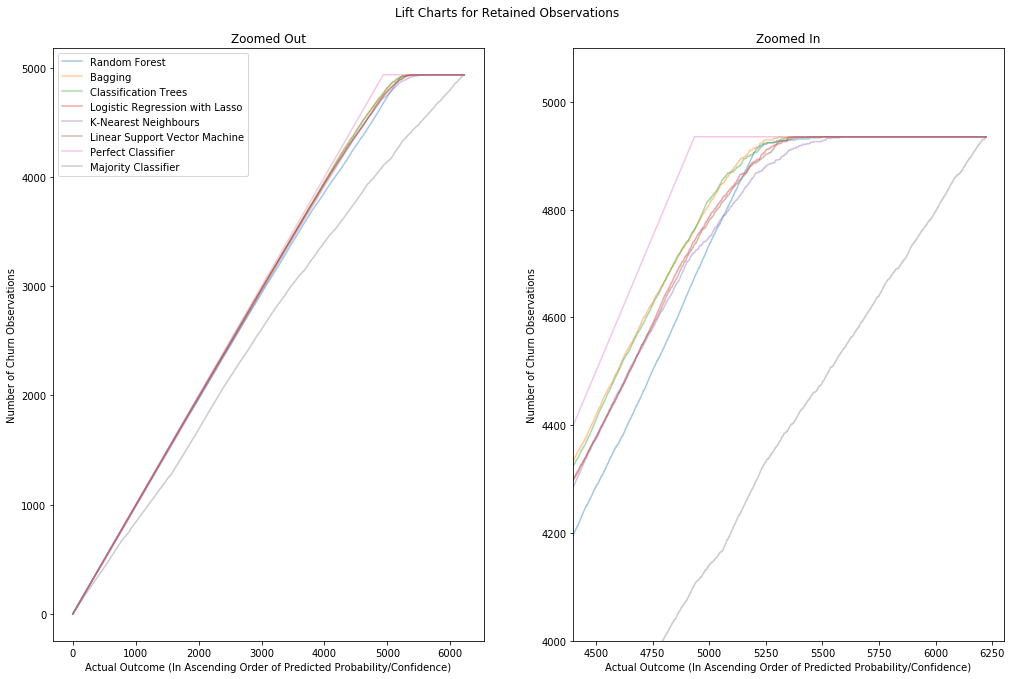

In [7]:
# Lift Chart

# Data Processing

x = np.arange(1, (len(y_pred_prob_rf)+1))

# Random Forest
rf_df = pd.DataFrame()
rf_df['probability'] = y_pred_prob_rf
rf_df['actual'] = test_y['retained']
rf_df = rf_df.sort_values(by='probability', ascending=False)
rf_df['cumsum'] = np.cumsum(rf_df['actual'])
rf_df['index'] = x

# Bagging
bag_df = pd.DataFrame()
bag_df['probability'] = y_pred_prob_bag
bag_df['actual'] = test_y['retained']
bag_df = bag_df.sort_values(by='probability', ascending=False)
bag_df['cumsum'] = np.cumsum(bag_df['actual'])
bag_df['index'] = x

# Classification Trees
tree_df = pd.DataFrame()
tree_df['probability'] = y_pred_prob_tree
tree_df['actual'] = test_y['retained']
tree_df = tree_df.sort_values(by='probability', ascending=False)
tree_df['cumsum'] = np.cumsum(tree_df['actual'])
tree_df['index'] = x

# Logistic
log_df = pd.DataFrame()
log_df['probability'] = y_pred_prob_log
log_df['actual'] = test_y['retained']
log_df = log_df.sort_values(by='probability', ascending=False)
log_df['cumsum'] = np.cumsum(log_df['actual'])
log_df['index'] = x

# Knn
knn_df = pd.DataFrame()
knn_df['probability'] = y_pred_prob_knn
knn_df['actual'] = test_y['retained']
knn_df = knn_df.sort_values(by='probability', ascending=False)
knn_df['cumsum'] = np.cumsum(knn_df['actual'])
knn_df['index'] = x

# SVMs
svm_df = pd.DataFrame()
svm_df['probability'] = y_pred_prob_svm
svm_df['predicted'] =  y_pred_svm
svm_df['actual'] = test_y['retained']
svm_df = svm_df.sort_values(by=['predicted','probability'], ascending=[False,False])
svm_df['cumsum'] = np.cumsum(svm_df['actual'])
svm_df['index'] = x

# Perfect Classifier
per_df = pd.DataFrame()
per_df['actual'] = test_y['retained']
per_df = per_df.sort_values(by='actual', ascending=False)
per_df['cumsum'] = np.cumsum(per_df['actual'])
per_df['index'] = x

# Majority Classifier
maj_df = pd.DataFrame()
maj_df['probability'] = y_pred_prob_maj
maj_df['actual'] = test_y['retained']
maj_df = maj_df.sort_values(by='probability', ascending=False)
maj_df['cumsum'] = np.cumsum(maj_df['actual'])
maj_df['index'] = x

# Plot

# Layout
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(122)
ax1 = plt.subplot(121)

# Plot ax
ax.plot(rf_df['index'],rf_df['cumsum'], label = 'Random Forest', alpha = 0.4)
ax.plot(bag_df['index'],bag_df['cumsum'], label = 'Bagging', alpha = 0.4)
ax.plot(tree_df['index'],tree_df['cumsum'], label = 'Classification Trees', alpha = 0.4)
ax.plot(log_df['index'],log_df['cumsum'], label = 'Logistic Regression with Lasso', alpha = 0.4)
ax.plot(knn_df['index'],knn_df['cumsum'], label = 'K-Nearest Neighbours', alpha = 0.4)
ax.plot(svm_df['index'],svm_df['cumsum'], label = 'Linear Support Vector Machine', alpha = 0.4)
ax.plot(per_df['index'],per_df['cumsum'], label = 'Perfect Classifier', alpha = 0.4)
ax.plot(maj_df['index'],maj_df['cumsum'], label = 'Majority Classifier', alpha = 0.4)
ax.set_title('Zoomed In')
ax.set_ylabel('Number of Churn Observations')
ax.set_xlabel('Actual Outcome (In Ascending Order of Predicted Probability/Confidence)')


# Zoom in 
ax.set_ylim(4000,5100)
ax.set_xlim(4400,6300)

# PLot ax1
ax1.plot(rf_df['index'],rf_df['cumsum'], label = 'Random Forest', alpha = 0.4)
ax1.plot(bag_df['index'],bag_df['cumsum'], label = 'Bagging', alpha = 0.4)
ax1.plot(tree_df['index'],tree_df['cumsum'], label = 'Classification Trees', alpha = 0.4)
ax1.plot(log_df['index'],log_df['cumsum'], label = 'Logistic Regression with Lasso', alpha = 0.4)
ax1.plot(knn_df['index'],knn_df['cumsum'], label = 'K-Nearest Neighbours', alpha = 0.4)
ax1.plot(svm_df['index'],svm_df['cumsum'], label = 'Linear Support Vector Machine', alpha = 0.4)
ax1.plot(per_df['index'],per_df['cumsum'], label = 'Perfect Classifier', alpha = 0.4)
ax1.plot(maj_df['index'],maj_df['cumsum'], label = 'Majority Classifier', alpha = 0.4)
ax1.set_title('Zoomed Out')
ax1.set_ylabel('Number of Churn Observations')
ax1.set_xlabel('Actual Outcome (In Ascending Order of Predicted Probability/Confidence)')

plt.legend()
plt.suptitle('Lift Charts for Retained Observations')
plt.tight_layout(pad = 4)
plt.show()

#### Churn Observations

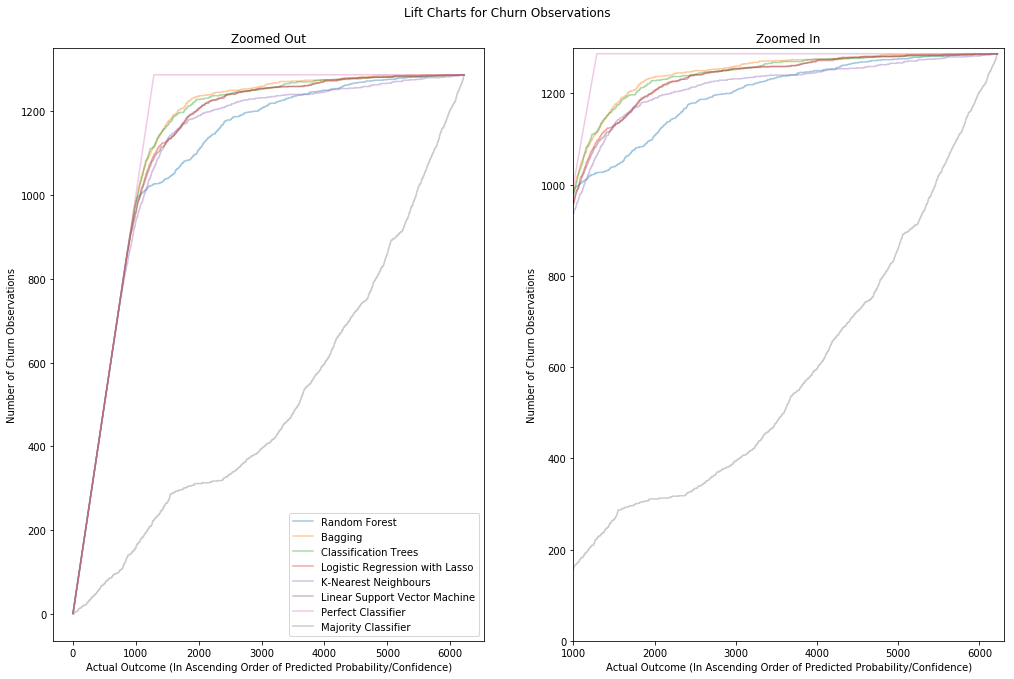

In [8]:
# Lift Chart for Churn

# Data Processing

x = np.arange(1, (len(y_pred_prob_rf)+1))

# Random Forest
rf_df = pd.DataFrame()
rf_df['probability'] = [1-i for i in y_pred_prob_rf]
rf_df['actual'] = test_y['retained']
rf_df = rf_df.sort_values(by='probability', ascending=False)
rf_df['actual'] = np.where(rf_df['actual'] == 0, 1, 0)
rf_df['cumsum'] = np.cumsum(rf_df['actual'])
rf_df['index'] = x

# Bagging
bag_df = pd.DataFrame()
bag_df['probability'] = [1-i for i in y_pred_prob_bag]
bag_df['actual'] = test_y['retained']
bag_df = bag_df.sort_values(by='probability', ascending=False)
bag_df['actual'] = np.where(bag_df['actual'] == 0, 1, 0)
bag_df['cumsum'] = np.cumsum(bag_df['actual'])
bag_df['index'] = x

# Classification Trees
tree_df = pd.DataFrame()
tree_df['probability'] = [1-i for i in y_pred_prob_tree]
tree_df['actual'] = test_y['retained']
tree_df = tree_df.sort_values(by='probability', ascending=False)
tree_df['actual'] = np.where(tree_df['actual'] == 0, 1, 0)
tree_df['cumsum'] = np.cumsum(tree_df['actual'])
tree_df['index'] = x

# Logistic
log_df = pd.DataFrame()
log_df['probability'] = [1-i for i in y_pred_prob_log]
log_df['actual'] = test_y['retained']
log_df = log_df.sort_values(by='probability', ascending=False)
log_df['actual'] = np.where(log_df['actual'] == 0, 1, 0)
log_df['cumsum'] = np.cumsum(log_df['actual'])
log_df['index'] = x

# Knn
knn_df = pd.DataFrame()
knn_df['probability'] = [1-i for i in y_pred_prob_knn]
knn_df['actual'] = test_y['retained']
knn_df = knn_df.sort_values(by='probability', ascending=False)
knn_df['actual'] = np.where(knn_df['actual'] == 0, 1, 0)
knn_df['cumsum'] = np.cumsum(knn_df['actual'])
knn_df['index'] = x

# SVMs
svm_df = pd.DataFrame()
svm_df['probability'] = y_pred_prob_svm
svm_df['predicted'] =  y_pred_svm
svm_df['actual'] = test_y['retained']
svm_df['actual'] = np.where(svm_df['actual'] == 0, 1, 0)
svm_df = svm_df.sort_values(by=['predicted','probability'], ascending=[True,True])
svm_df['cumsum'] = np.cumsum(svm_df['actual'])
svm_df['index'] = x

# Perfect Classifier
per_df = pd.DataFrame()
per_df['actual'] = test_y['retained']
per_df['actual'] = np.where(per_df['actual'] == 0, 1, 0)
per_df = per_df.sort_values(by='actual', ascending=False)
per_df['cumsum'] = np.cumsum(per_df['actual'])
per_df['index'] = x

# Majority Classifier
maj_df = pd.DataFrame()
maj_df['probability'] = y_pred_prob_maj
maj_df['actual'] = test_y['retained']
maj_df = maj_df.sort_values(by='probability', ascending=False)
maj_df['actual'] = np.where(maj_df['actual'] == 0, 1, 0)
maj_df['cumsum'] = np.cumsum(maj_df['actual'])
maj_df['index'] = x

# Layout
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(122)
ax1 = plt.subplot(121)

# Plot ax
ax.plot(rf_df['index'],rf_df['cumsum'], label = 'Random Forest', alpha = 0.4)
ax.plot(bag_df['index'],bag_df['cumsum'], label = 'Bagging', alpha = 0.4)
ax.plot(tree_df['index'],tree_df['cumsum'], label = 'Classification Trees', alpha = 0.4)
ax.plot(log_df['index'],log_df['cumsum'], label = 'Logistic Regression with Lasso', alpha = 0.4)
ax.plot(knn_df['index'],knn_df['cumsum'], label = 'K-Nearest Neighbours', alpha = 0.4)
ax.plot(svm_df['index'],svm_df['cumsum'], label = 'Linear Support Vector Machine', alpha = 0.4)
ax.plot(per_df['index'],per_df['cumsum'], label = 'Perfect Classifier', alpha = 0.4)
ax.plot(maj_df['index'],maj_df['cumsum'], label = 'Majority Classifier', alpha = 0.4)
ax.set_title('Zoomed In')
ax.set_ylabel('Number of Churn Observations')
ax.set_xlabel('Actual Outcome (In Ascending Order of Predicted Probability/Confidence)')


# Zoom in 
ax.set_ylim(0,1300)
ax.set_xlim(1000,6300)

# PLot ax1
ax1.plot(rf_df['index'],rf_df['cumsum'], label = 'Random Forest', alpha = 0.4)
ax1.plot(bag_df['index'],bag_df['cumsum'], label = 'Bagging', alpha = 0.4)
ax1.plot(tree_df['index'],tree_df['cumsum'], label = 'Classification Trees', alpha = 0.4)
ax1.plot(log_df['index'],log_df['cumsum'], label = 'Logistic Regression with Lasso', alpha = 0.4)
ax1.plot(knn_df['index'],knn_df['cumsum'], label = 'K-Nearest Neighbours', alpha = 0.4)
ax1.plot(svm_df['index'],svm_df['cumsum'], label = 'Linear Support Vector Machine', alpha = 0.4)
ax1.plot(per_df['index'],per_df['cumsum'], label = 'Perfect Classifier', alpha = 0.4)
ax1.plot(maj_df['index'],maj_df['cumsum'], label = 'Majority Classifier', alpha = 0.4)
ax1.set_title('Zoomed Out')
ax1.set_ylabel('Number of Churn Observations')
ax1.set_xlabel('Actual Outcome (In Ascending Order of Predicted Probability/Confidence)')


plt.legend()
plt.suptitle('Lift Charts for Churn Observations')
plt.tight_layout(pad = 4)
plt.show()

### Accuracy Measures

It is important to note that for the purpose of calculating the accuracy measures, churn has been taken as the important class.

In [9]:
# Tabulate Results
result = pd.DataFrame({'Algorithm': ['Logistics Regression with Lasso', 
                                     'Classification Tree', 'Bagging', 
                                     'Random Forest', 'K-Nearest Neighbours', 
                                     'Linear SVMS', 'Majority Class Classifier'],
                        'Accuracy':[accuracy_log, accuracy_tree, accuracy_bag, 
                                    accuracy_rf, accuracy_knn, accuracy_svm, accuracy_maj],
                        'Specificity':[specificity_log, specificity_tree, specificity_bag, 
                                     specificity_rf, specificity_knn, specificity_svm, specificity_maj],
                      'Sensitivity':[sensitivity_log, sensitivity_tree, sensitivity_bag, 
                                     sensitivity_rf, sensitivity_knn, sensitivity_svm, sensitivity_maj]})
    
result.set_index('Algorithm').iloc[:, [0,1,2]].sort_values(['Sensitivity','Specificity'], ascending=[False, False])

,Accuracy,Sensitivity,Specificity
Algorithm,,,
Classification Tree,0.954516,0.840715,0.984195
Logistics Regression with Lasso,0.942462,0.832945,0.971023
Linear SVMS,0.939569,0.825175,0.969402
Bagging,0.952427,0.798757,0.992503
K-Nearest Neighbours,0.934426,0.735043,0.986424
Random Forest,0.927837,0.655789,0.998784
Majority Class Classifier,0.793153,0.000000,1.000000


## Conclusion

The following factors determine the final choice of the machine learning algorithm which will be used:

> 1) Ease in handling categorical variables:

>  * Since Trees don't use a distance metric, these type of algorithms general work out of the box. They readily handle both numeric and categorical data.
  
>2) Effect from Unimportant Variables:

>  * Trees are not affected by unimportant predictors.
  
Having said that, it is important to address some of the issues with plain Classification Trees:

>1) They are generally sensitive to changes in the training data.

>2) Over- and underfitting can occur fairly easily

>3) some relationships may be difficult to capture due to axis-parallel splits

**Conclusion:**

> Since Logistic Regression in the closest substitue to Classification Trees in terms of performance, we can use this algorithm. Advantages of Logistic Regression over Classification Tree include interpretability of the results as well as less variability. Although Logistic Regression is a linear classifier, it can capture non-linear relations through the use of quadratic and logarithmic variables.